In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sympy import *
init_printing()
theta, psi, chi = symbols('theta psi chi')

cosTheta = sin(theta) * sin(psi) * sin(chi) + cos(theta)*cos(chi)
sin2Theta = 1 -cosTheta**2
sin2Theta

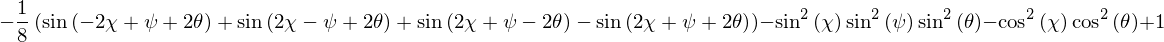

In [4]:
sin2Theta.expand().trigsimp()

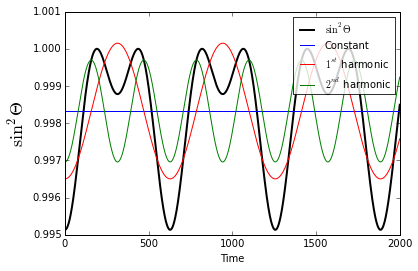

In [51]:
def Sin2ThetaF(theta, chi, psi):
    cosTheta = np.sin(theta)*np.sin(psi)*np.sin(chi) + np.cos(theta)*np.cos(chi)
    return 1 - cosTheta**2

time = np.linspace(0, 2e3, 1000)
psidot = 1e-3 * 10
k = 1

theta = np.radians(3)
chi =  np.radians(89)
psi = psidot * time + np.pi/2

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(time, k*Sin2ThetaF(theta, chi, psi), color="k", lw=2, label="$\sin^{2}\Theta$")

CONST = np.zeros(len(time)) + k*(1 - np.cos(theta)**2 * np.cos(chi)**2 
                                 - .5 * (np.sin(theta)*np.sin(chi))**2)
ax.plot(time, CONST, color="b", label="Constant")

FIRST = -0.5 * k * np.sin(2*theta) * np.sin(2*chi) * np.sin(psi)
ax.plot(time, CONST + FIRST, color="r", label=r"$1^{st}$ harmonic")


SECOND = 0.5 * k * (np.sin(theta) * sin(chi))**2 * np.cos(2 * psi)
ax.plot(time, CONST + SECOND, color="green", label=r"$2^{nd}$ harmonic")

ax.legend(fontsize=10, framealpha=0.8)
#plt.plot(time, CONST + SECOND + FIRST)

ax.set_xlabel("Time")
ax.set_ylabel("$\sin^{2}\Theta$", size=18)

plt.savefig("img/Sin2Theta.pdf")
